# Linear Regression Part (A)
## Getting the Dataset

Here, we are getting our previous dataset from previous assignment and using it to apply simple/multiple linear regression on to it. We are using the drinks dataset.

In [1638]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = "./"

filename_read = os.path.join(path,"drinks.csv")
drink_Data = pd.read_csv(filename_read, na_values=['NA','?'])
drink_Data.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America
6,Argentina,193,25,221,8.3,South America
7,Armenia,21,179,11,3.8,Europe
8,Australia,261,72,212,10.4,Oceania
9,Austria,279,75,191,9.7,Europe


### Useful functions
There are 3 useful function that can be found in the Tutorial_5_Regression.ipynb file. One noteable method that we used throughout this project was the normalize_numeric_minmax which help us on normalizing certain column that was not standarize when first observing the dataset.

In [1639]:
#Function to normalize columns
def normalize_numeric_minmax(df, name):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)

In [1640]:
# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
import collections
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.abc.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

In [1641]:
# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

## Simple Linear Regression

Creating a new dataset for holding onto the columns needed for Simple Linear Regression. In the new dataset we made, it has a new column called 'Combine_Servings' that takes the total amount of beer, spirit, and wine serverings.

In [1642]:
import pandas as pd

drink_Data.head()

new_drink_Data = drink_Data[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']]

new_drink_Data['Combine_Servings'] = new_drink_Data[['beer_servings', 'spirit_servings', 'wine_servings']].sum(axis=1)

new_drink_Data.head()

C:\Users\sho85\AppData\Local\Temp\ipykernel_9984\1029753255.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_drink_Data['Combine_Servings'] = new_drink_Data[['beer_servings', 'spirit_servings', 'wine_servings']].sum(axis=1)


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,Combine_Servings
0,0,0,0,0.0,0
1,89,132,54,4.9,275
2,25,0,14,0.7,39
3,245,138,312,12.4,695
4,217,57,45,5.9,319


### Preprocess our dataset
Look for outliers on the columns of interest: 'total_litres_of_pure_alcohol', 'Combine_Servings'

In [1643]:
# Compute the Z-score to assess outliers
Z_drink_data = new_drink_Data[['total_litres_of_pure_alcohol', 'Combine_Servings']].copy()
# Compute Z-score
Z_drink_data = (Z_drink_data-Z_drink_data.mean())/Z_drink_data.std()
print('Number of rows before discarding outliers = %d' % (Z_drink_data.shape[0]))
Z2 = Z_drink_data.loc[((Z_drink_data > -3).sum(axis=1)==2) & ((Z_drink_data <= 3).sum(axis=1)==2)]
print('Number of rows after discarding outliers = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 193
Number of rows after discarding outliers = 193


### Preparing our train/test
Here, we create an x and y varaible that looks at the independent variable, Combine_Servings, and the dependent variable, Total_Litres_of_Pure_Alcohol. We then use the train_test_split method to split of our data into 2 different types, one for training and one for testing. We made the test size take 25% of the data and stored it to a random seed on 1.

In [1644]:
x = new_drink_Data.iloc[:, 4].values #independent variable arrays, Combine_Servings
y = new_drink_Data.iloc[:, 3].values #dependent variable arrays, Total_Litres_Of_Pure_Alcohol

In [1645]:
# Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/4, random_state=1)

In [1646]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(144,)
(144,)
(49,)
(49,)


The code snippet below is to reshape the training and testing of the independent variable into a 2-dimensional arrays for plotting purposes

In [1647]:
# Making the training and testing 2 Dimensional arrays
x_train = np.array(x_train).reshape(-1, 1)
x_train

array([[274],
       [571],
       [385],
       [275],
       [  6],
       [583],
       [ 86],
       [328],
       [  6],
       [643],
       [404],
       [ 51],
       [ 55],
       [111],
       [123],
       [219],
       [106],
       [ 28],
       [553],
       [  0],
       [112],
       [  0],
       [  6],
       [234],
       [431],
       [369],
       [ 57],
       [  0],
       [ 49],
       [ 57],
       [665],
       [ 56],
       [279],
       [605],
       [488],
       [  0],
       [559],
       [  0],
       [  6],
       [640],
       [ 56],
       [634],
       [257],
       [134],
       [156],
       [ 39],
       [ 11],
       [295],
       [134],
       [439],
       [ 17],
       [  0],
       [233],
       [123],
       [638],
       [325],
       [380],
       [ 82],
       [529],
       [  0],
       [504],
       [169],
       [185],
       [ 83],
       [ 17],
       [382],
       [600],
       [122],
       [370],
       [ 72],
       [ 17],
      

In [1648]:
x_test = np.array(x_test).reshape(-1, 1)
x_test

array([[459],
       [124],
       [ 21],
       [426],
       [ 43],
       [349],
       [197],
       [596],
       [130],
       [ 54],
       [ 62],
       [ 39],
       [216],
       [591],
       [147],
       [463],
       [ 45],
       [349],
       [152],
       [ 80],
       [ 36],
       [319],
       [  0],
       [436],
       [ 18],
       [  0],
       [ 30],
       [141],
       [ 11],
       [407],
       [ 44],
       [ 11],
       [ 23],
       [188],
       [ 50],
       [352],
       [328],
       [ 23],
       [398],
       [  0],
       [273],
       [360],
       [165],
       [541],
       [ 20],
       [  6],
       [120],
       [113],
       [565]], dtype=int64)

### Fitting
Here, we fit the training variables and display the intercept and slope of the line once fitted.

In [1653]:
# Fitting
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
regressor = linear_model.LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [1654]:
regressor.score(x_test, y_test)

0.6980800923002739

In [1655]:
regressor.score(x_train, y_train)

0.9140145685882098

In [1656]:
intercept = regressor.intercept_
intercept

0.5227534772978712

### Predicting
In this section, we use the predict method to predict the outcome of x_train and x_test and store it into a variable used for plotting to see how close our model is to the actual data

In [1657]:
# Predicting; y_pred are the predicted results of the Combine_Servings
y_pred = regressor.predict(x_test)
y_pred

array([ 8.4791027 ,  2.67218115,  0.88676945,  7.90707759,  1.26811953,
        6.57235234,  3.93757003, 10.8538736 ,  2.77618572,  1.45879456,
        1.59746732,  1.19878315,  4.26691782, 10.76720313,  3.07086532,
        8.54843907,  1.30278771,  6.57235234,  3.15753579,  1.90948101,
        1.14678087,  6.05232951,  0.52275348,  8.08041853,  0.83476717,
        0.52275348,  1.0427763 ,  2.96686075,  0.71342851,  7.5777298 ,
        1.28545362,  0.71342851,  0.92143764,  3.78156318,  1.38945819,
        6.62435462,  6.20833636,  0.92143764,  7.42172295,  0.52275348,
        5.25496118,  6.76302737,  3.38287901,  9.90049842,  0.86943536,
        0.62675804,  2.60284478,  2.48150612, 10.31651668])

Plotting the training and test data first and including the predicted test set on y (red line)

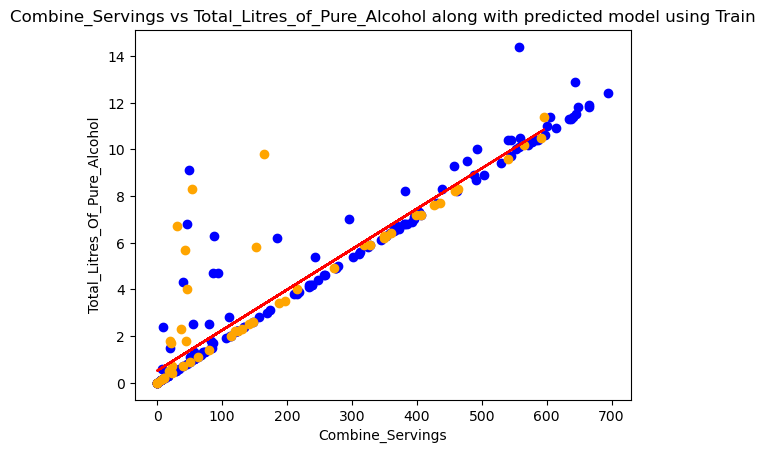

In [1658]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, c='blue') # plotting the training data
plt.scatter(x_test, y_test, c='orange') # plotting the testing data
plt.plot(x_test, y_pred, color='red') # plotting the observation line but using the predicted dependent variable

plt.title("Combine_Servings vs Total_Litres_of_Pure_Alcohol along with predicted model using Train") # stating the title of the graph
 
plt.xlabel("Combine_Servings") # adding the name of x-axis
plt.ylabel("Total_Litres_Of_Pure_Alcohol") # adding the name of y-axis
plt.show() # specifies end of graph

In [1659]:
# Model evaluation
print("Root mean squared error on testing = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared on testing= %.4f' % r2_score(y_test, y_pred))

Root mean squared error on testing = 1.8266
R-squared on testing= 0.6981


## Lasso Regression

We use lasso regression here for simple linear regression partly as a method to prevent overfitting for the drinks dataset that we use. 

In [1660]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)

lasso_reg.fit(x_train, y_train)

print("Lasso regression score on train:", lasso_reg.score(x_train, y_train))
print("Lasso regression score on test:", lasso_reg.score(x_test, y_test))

Lasso regression score on train: 0.9104229115882162
Lasso regression score on test: 0.7116759135013287


In [1661]:
y_pred_lasso_test = lasso_reg.predict(x_test)
y_pred_lasso_test

array([ 8.25308869,  2.81018009,  1.13668879,  7.71692157,  1.49413353,
        6.46586497,  3.99624674, 10.47899459,  2.90766502,  1.6728559 ,
        1.80283581,  1.42914358,  4.30494902, 10.39775715,  3.18387232,
        8.31807864,  1.52662851,  6.46586497,  3.26510976,  2.0952906 ,
        1.38040111,  5.97844032,  0.79549153,  7.87939646,  1.08794632,
        0.79549153,  1.28291618,  3.08638739,  0.97421391,  7.40821929,
        1.51038102,  0.97421391,  1.16918377,  3.85001934,  1.60786595,
        6.51460744,  6.12466771,  1.16918377,  7.2619919 ,  0.79549153,
        5.23105585,  6.64458734,  3.47632711,  9.58538273,  1.1204413 ,
        0.89297646,  2.74519014,  2.63145772,  9.97532245])

Plotting the testing data and observing how closely it resembles our train data.
Here we have two graphs that shows when we use the standard linear regression and the next graph when we use lasso regresssion (to fit the data better)

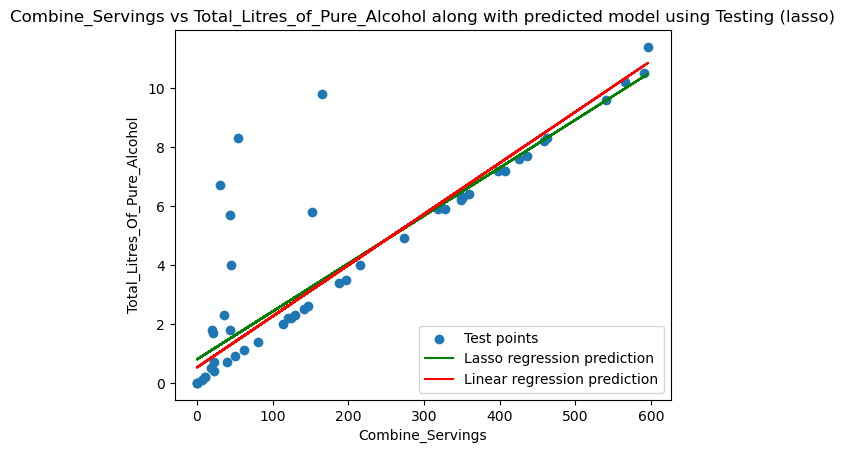

In [1662]:
#plot for the Test data
import matplotlib.pyplot as plt

plt.scatter(x_test, y_test) # data scattered on the graph 
plt.plot(x_test, y_pred_lasso_test, color='green') # plotting the observation line from Lasso Regression
plt.plot(x_test, y_pred, color='red') # plotting the observation line from Linear Regression

plt.title("Combine_Servings vs Total_Litres_of_Pure_Alcohol along with predicted model using Testing (lasso)") # stating the title of the graph
 
plt.xlabel("Combine_Servings") # adding the name of x-axis
plt.ylabel("Total_Litres_Of_Pure_Alcohol") # adding the name of y-axis
plt.legend(["Test points", "Lasso regression prediction", "Linear regression prediction"])
plt.show() # specifies end of graph

### Finding the mean squarred error and the R-squared on both the testing and training models.
Mean Squared Error: how much the residuals vary around the fitted lines <br>
R-Squared: Correlation between x and y; ranges from 0 to 1; higher the number the better the model

In [1663]:
# Model evaluation
print("Root mean squared error on testing = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print('R-squared on testing= %.4f' % r2_score(y_test, y_pred_lasso_test))

Root mean squared error on testing = 1.7850
R-squared on testing= 0.7117


## Multiple Linear Regression
Using the same dataset, drinks.csv, we used all three servings columns, beer, spirit, and wine, as independent variables and have the dependent variable be the Total_litres_of_Pure_Alcohol. We then split the data into training and testing varaibles, saving only 25% for testing.

In [1664]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

path = "./"

filename_read = os.path.join(path,"drinks.csv")
drink_Data = pd.read_csv(filename_read, na_values=['NA','?'])

x_train2, x_test2, y_train2, y_test2 = train_test_split(
  drink_Data.drop(columns=['total_litres_of_pure_alcohol', 'country', 'continent']), 
  drink_Data['total_litres_of_pure_alcohol'], 
  test_size=0.25,
  random_state=0)
print("x_train shape: ", x_train2.shape)
print("y_train shape: ", y_train2.shape)

print("x_test shape: ", x_test2.shape)
print("y_test shape: ", y_test2.shape)

x_train shape:  (144, 3)
y_train shape:  (144,)
x_test shape:  (49, 3)
y_test shape:  (49,)


### Fitting the training models
In order to create a more accurate outcome, we fit the training model and display the y-intercept and slope.

In [1665]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(x_train2, y_train2)

LinearRegression()

In [1666]:
print("Multiple linear regression score on Train:", regr.score(x_train2, y_train2))
print("Multiple linear regression score on Test:", regr.score(x_test2, y_test2))
print("Multiple linear regression intercept:", regr.intercept_)
print("Multiple linear regression slope:", regr.coef_)

Multiple linear regression score on Train: 0.8905004885512054
Multiple linear regression score on Test: 0.8184310767713026
Multiple linear regression intercept: 0.6137880966226286
Multiple linear regression slope: [0.01803339 0.0163801  0.01632606]


Predicting the training data first

In [1667]:
# Apply model to the test set
y_pred2 = regr.predict(x_test2)
y_pred2

array([ 0.6137881 ,  4.95718354,  8.44357939,  0.71697453,  0.6137881 ,
        1.62803282,  1.50468261,  1.57271168,  3.19396154,  4.10411377,
        5.28451951,  6.93048003,  7.23859976,  5.12989001,  0.82522893,
        6.07683173,  0.93838917,  4.77496331,  6.57519943,  1.9693534 ,
        0.96944203,  1.0822966 ,  0.6137881 ,  1.14641534,  1.38522416,
        1.68860262,  2.30220578,  4.87828059,  1.54050705,  2.07193951,
       11.71024539,  6.19537265,  3.19526609,  1.3775969 , 12.09615162,
        7.75070448,  1.29356602,  3.47884978, 11.59975079,  1.43406807,
        9.96099509,  0.71350582, 11.23522251,  2.06240732,  0.6137881 ,
        1.56573879, 11.41806541,  1.22190954,  2.72272402])

Plotting the training and predicted variables of the dependent values and showing the root mean squared error and R-squarred score

Root mean squared error = 1.5794
R-squared = 0.8184


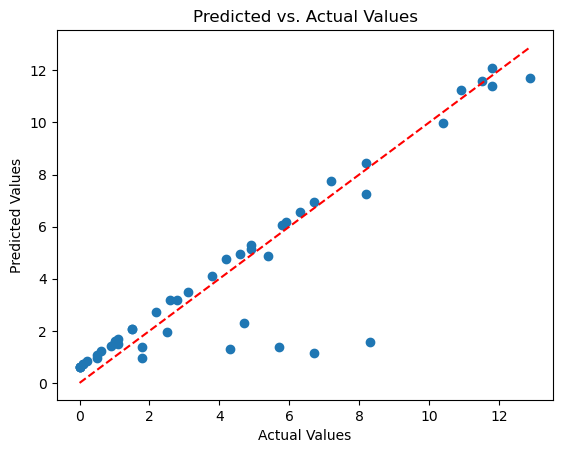

In [1668]:
# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test2, y_pred2)))
print('R-squared = %.4f' % r2_score(y_test2, y_pred2))


plt.scatter(y_test2, y_pred2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], color='red', linestyle='--')
plt.show()

## Regression and Classification 
Using Admission dataset

In [1669]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = "./"

filename_read = os.path.join(path,"Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv")
admission_Data = pd.read_csv(filename_read, na_values=['NA','?'])

print(admission_Data.shape)
print(admission_Data.isnull().sum())
admission_Data.head(10)

(500, 9)
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


Normalizing CGPA, GRE Score, and TOEFL Score using the provided function in tutorial_5_regression

In [1670]:
normalize_numeric_minmax(admission_Data, 'CGPA')
normalize_numeric_minmax(admission_Data, 'GRE Score')
normalize_numeric_minmax(admission_Data, 'TOEFL Score')
normalize_numeric_minmax(admission_Data, 'University Rating')
normalize_numeric_minmax(admission_Data, 'SOP')
normalize_numeric_minmax(admission_Data, 'LOR')

admission_Data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,0.94,0.928571,0.75,0.875,0.875,0.913462,1,0.92
1,2,0.68,0.535714,0.75,0.750,0.875,0.663462,1,0.76
2,3,0.52,0.428571,0.50,0.500,0.625,0.384615,1,0.72
3,4,0.64,0.642857,0.50,0.625,0.375,0.599359,1,0.80
4,5,0.48,0.392857,0.25,0.250,0.500,0.451923,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,0.84,0.571429,1.00,0.875,0.750,0.711538,1,0.87
496,497,0.94,0.892857,1.00,1.000,1.000,0.983974,1,0.96
497,498,0.80,1.000000,1.00,0.875,1.000,0.884615,1,0.93
498,499,0.44,0.392857,0.75,0.750,1.000,0.522436,0,0.73


In [1671]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# admission_Data = admission_Data.drop(['Serial No.'], axis=1)
# sns.pairplot(admission_Data)
# plt.show()

### Split dataset and prepare data for training.
Train split 75% and test split 25%. Keep GRE score, TOEFL Score, CGPA as training columns - independent variables

In [1672]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

x_train3, x_test3, y_train3, y_test3 = train_test_split(
    admission_Data.drop(columns=['Serial No.', 'Research', 'Chance of Admit']),
    admission_Data['Chance of Admit'],
    test_size=0.25,
    random_state=3
)

print("x_train shape: ", x_train3.shape)
print("y_train shape: ", y_train3.shape)

print("x_test shape: ", x_test3.shape)
print("y_test shape: ", y_test3.shape)

x_train shape:  (375, 6)
y_train shape:  (375,)
x_test shape:  (125, 6)
y_test shape:  (125,)


In [1673]:
from sklearn import linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(x_train3, y_train3)

LinearRegression()

In [1674]:
# Apply model to the test set
y_pred3 = regr.predict(x_test3)

Root mean squared error = 0.0678
R-squared = 0.7583


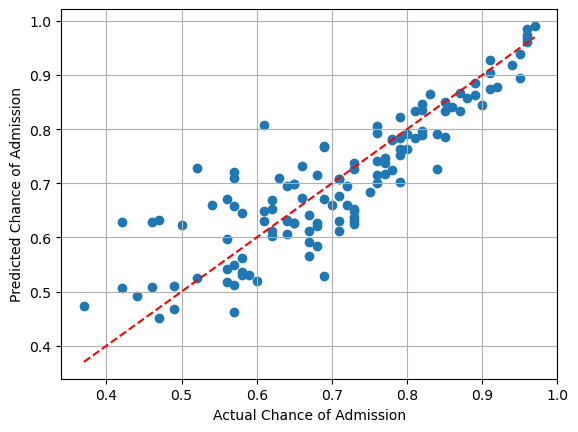

In [1675]:
# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test3, y_pred3)))
print('R-squared = %.4f' % r2_score(y_test3, y_pred3))

plt.scatter(y_test3, y_pred3)
plt.plot([min(y_test3), max(y_test3)], [min(y_test3), max(y_test3)], color='red', linestyle='--')
plt.xlabel("Actual Chance of Admission")
plt.ylabel("Predicted Chance of Admission")
plt.grid(True)
plt.show()

### Classification

In [1676]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

path = "./"

filename_read = os.path.join(path,"Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv")
admission_Data = pd.read_csv(filename_read, na_values=['NA','?'])

print(admission_Data.shape)
print(admission_Data.isnull().sum())
admission_Data.head(10)

(500, 9)
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [1677]:
normalize_numeric_minmax(admission_Data, 'CGPA')
normalize_numeric_minmax(admission_Data, 'GRE Score')
normalize_numeric_minmax(admission_Data, 'TOEFL Score')
normalize_numeric_minmax(admission_Data, 'University Rating')
normalize_numeric_minmax(admission_Data, 'SOP')
normalize_numeric_minmax(admission_Data, 'LOR')

admission_Data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,0.94,0.928571,0.75,0.875,0.875,0.913462,1,0.92
1,2,0.68,0.535714,0.75,0.750,0.875,0.663462,1,0.76
2,3,0.52,0.428571,0.50,0.500,0.625,0.384615,1,0.72
3,4,0.64,0.642857,0.50,0.625,0.375,0.599359,1,0.80
4,5,0.48,0.392857,0.25,0.250,0.500,0.451923,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,0.84,0.571429,1.00,0.875,0.750,0.711538,1,0.87
496,497,0.94,0.892857,1.00,1.000,1.000,0.983974,1,0.96
497,498,0.80,1.000000,1.00,0.875,1.000,0.884615,1,0.93
498,499,0.44,0.392857,0.75,0.750,1.000,0.522436,0,0.73


Creating a classification column for Chance of Admit where above 80% is high chance of being admitted, 60% chance of being admitted is medium, and anything under is a low chance

In [1678]:
def decategorize_admission(chance):
    if chance >= 0.8:
        return 2
    elif chance >= 0.6:
        return 1
    else:
        return 0

admission_Data['Admission_Status'] = admission_Data['Chance of Admit'].apply(decategorize_admission)
admission_Data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admission_Status
0,1,0.94,0.928571,0.75,0.875,0.875,0.913462,1,0.92,2
1,2,0.68,0.535714,0.75,0.750,0.875,0.663462,1,0.76,1
2,3,0.52,0.428571,0.50,0.500,0.625,0.384615,1,0.72,1
3,4,0.64,0.642857,0.50,0.625,0.375,0.599359,1,0.80,2
4,5,0.48,0.392857,0.25,0.250,0.500,0.451923,0,0.65,1
...,...,...,...,...,...,...,...,...,...,...
495,496,0.84,0.571429,1.00,0.875,0.750,0.711538,1,0.87,2
496,497,0.94,0.892857,1.00,1.000,1.000,0.983974,1,0.96,2
497,498,0.80,1.000000,1.00,0.875,1.000,0.884615,1,0.93,2
498,499,0.44,0.392857,0.75,0.750,1.000,0.522436,0,0.73,1


In [1679]:
x = admission_Data.drop(columns=['Chance of Admit', 'Serial No.', 'Admission_Status'])
# x = admission_Data['Chance of Admit']
y = admission_Data['Admission_Status']
x.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0


Encoding our category column to numerical

In [1680]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(x, y, test_size=0.25, random_state=10)
print(x_train4.shape)
print(y_train4.shape)
print(x_test4.shape)
print(y_test4.shape)
print(y_test4[:5])

(375, 7)
(375,)
(125, 7)
(125,)
151    2
424    2
154    2
190    2
131    1
Name: Admission_Status, dtype: int64


In [1681]:
clf = DecisionTreeClassifier(random_state = 0)
clf.fit(x_train4, y_train4)

DecisionTreeClassifier(random_state=0)

In [1682]:
y_pred4 = clf.predict(x_test4)
y_pred4

array([2, 2, 2, 2, 1, 1, 0, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 0,
       1, 2, 0, 2, 1, 0, 1, 1, 2, 2, 0, 1, 0, 1, 2, 1, 1, 0, 2, 1, 1, 2,
       2, 0, 1, 2, 2, 1, 2, 1, 1, 0, 1, 2, 2, 0, 2, 2, 1, 2, 1, 0, 1, 0,
       0, 1, 0, 2, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 1, 1,
       1, 2, 2, 1, 0, 2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 0, 2, 0, 2, 0, 1, 2,
       0, 1, 1, 0, 2, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2], dtype=int64)

## Compute the classification score on test data

In [1683]:
from sklearn.metrics import confusion_matrix
print("Classification score on test: ", clf.score(x_test4, y_test4))
confusion_matrix(y_test4, y_pred4)

Classification score on test:  0.656


array([[11,  7,  1],
       [15, 39, 14],
       [ 1,  5, 32]], dtype=int64)

## Visualize the decision rules

In [1684]:
from sklearn.tree import export_text

tree_rules = export_text(clf, feature_names=list(x_train4.columns))
print(tree_rules)

|--- CGPA <= 0.65
|   |--- CGPA <= 0.39
|   |   |--- GRE Score <= 0.41
|   |   |   |--- SOP <= 0.44
|   |   |   |   |--- GRE Score <= 0.07
|   |   |   |   |   |--- LOR <= 0.56
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- LOR >  0.56
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- GRE Score >  0.07
|   |   |   |   |   |--- class: 0
|   |   |   |--- SOP >  0.44
|   |   |   |   |--- CGPA <= 0.34
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- CGPA >  0.34
|   |   |   |   |   |--- TOEFL Score <= 0.23
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- TOEFL Score >  0.23
|   |   |   |   |   |   |--- TOEFL Score <= 0.62
|   |   |   |   |   |   |   |--- TOEFL Score <= 0.34
|   |   |   |   |   |   |   |   |--- GRE Score <= 0.25
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- GRE Score >  0.25
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- TOEFL Score >  0.34
|   |   |   | 

The most important criteria in the splits are CGPA, 

Root mean squared error = 0.6261
R-squared = 0.0945


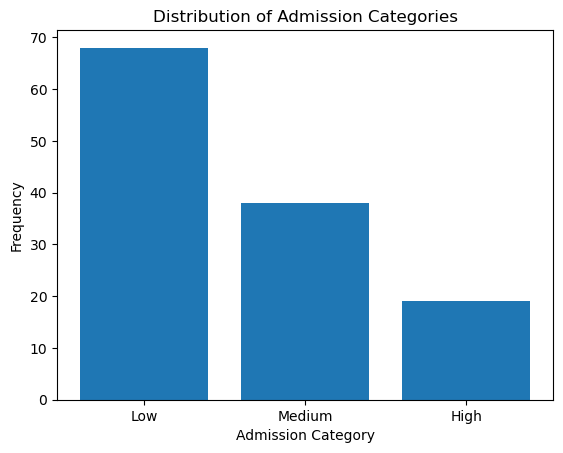

In [1685]:
import matplotlib.pyplot as plt

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test4, y_pred4)))
print('R-squared = %.4f' % r2_score(y_test4, y_pred4))

# # Count the frequency of each category
category_counts = y_test4.value_counts()
# Define the categories and their order for the bar chart
categories = ['Low', 'Medium', 'High']
# Create a bar chart
plt.bar(categories, category_counts)
plt.xlabel('Admission Category')
plt.ylabel('Frequency')
plt.title('Distribution of Admission Categories')
plt.show()

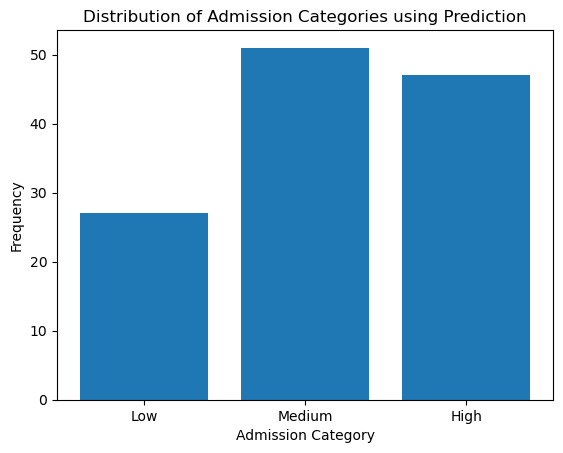

In [1686]:
from collections import Counter

category_counts = Counter(y_pred4)
# Define the categories and their order for the bar chart
categories = ['Low', 'Medium', 'High']

# Initialize a list to store the counts in the order of categories
count_list = [category_counts[0], category_counts[1], category_counts[2]]
# Create a bar chart
plt.bar(categories, count_list)
plt.xlabel('Admission Category')
plt.ylabel('Frequency')
plt.title('Distribution of Admission Categories using Prediction')
plt.show()

## Applying Lasso Regression

In [1687]:
path = "./"

filename_read = os.path.join(path,"Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv")
admission_Data = pd.read_csv(filename_read, na_values=['NA','?'])

print(admission_Data.shape)
print(admission_Data.isnull().sum())
admission_Data.head(10)

normalize_numeric_minmax(admission_Data, 'CGPA')
normalize_numeric_minmax(admission_Data, 'GRE Score')
normalize_numeric_minmax(admission_Data, 'TOEFL Score')
normalize_numeric_minmax(admission_Data, 'University Rating')
normalize_numeric_minmax(admission_Data, 'SOP')
normalize_numeric_minmax(admission_Data, 'LOR')

admission_Data

(500, 9)
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,0.94,0.928571,0.75,0.875,0.875,0.913462,1,0.92
1,2,0.68,0.535714,0.75,0.750,0.875,0.663462,1,0.76
2,3,0.52,0.428571,0.50,0.500,0.625,0.384615,1,0.72
3,4,0.64,0.642857,0.50,0.625,0.375,0.599359,1,0.80
4,5,0.48,0.392857,0.25,0.250,0.500,0.451923,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,0.84,0.571429,1.00,0.875,0.750,0.711538,1,0.87
496,497,0.94,0.892857,1.00,1.000,1.000,0.983974,1,0.96
497,498,0.80,1.000000,1.00,0.875,1.000,0.884615,1,0.93
498,499,0.44,0.392857,0.75,0.750,1.000,0.522436,0,0.73


In [1688]:
x = admission_Data.drop(columns=['Chance of Admit', 'Serial No.'])
y = admission_Data['Chance of Admit']
x_train5, x_test5, y_train5, y_test5 = train_test_split(x, y, test_size=0.30, random_state=10)
print(x_train5.shape)
print(y_train5.shape)
print(x_test5.shape)
print(y_test5.shape)

(350, 7)
(350,)
(150, 7)
(150,)


In [1689]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso
alpha = 0.01  # You can tune this hyperparameter
lasso_model = linear_model.Lasso(alpha=alpha)
lasso_model.fit(x_train5, y_train5)

Lasso(alpha=0.01)

In [1690]:
y_pred_test5 = lasso_model.predict(x_test5)

Root mean squared error = 0.0725
R-squared = 0.6929


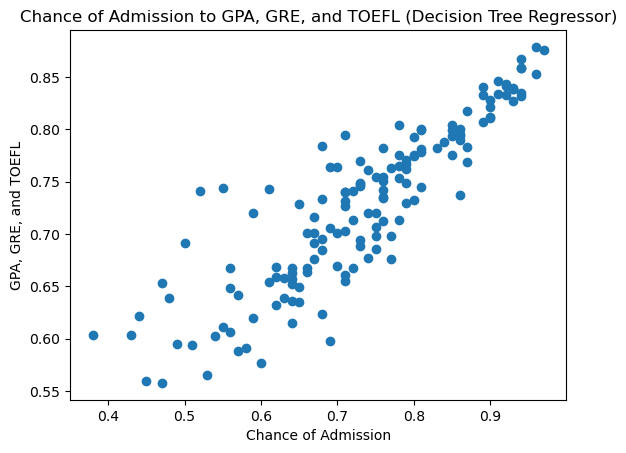

In [1691]:
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test5, y_pred_test5)))
print('R-squared = %.4f' % r2_score(y_test5, y_pred_test5))

# X_grid = np.arange(min(x), max(x), 0.01)

# reshape for reshaping the data into
# a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values

# X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(y_test5, y_pred_test5)
# plt.plot(y_test4, y_pred_test4, color = 'red')
plt.title('Chance of Admission to GPA, GRE, and TOEFL (Decision Tree Regressor)')
plt.xlabel('Chance of Admission')
plt.ylabel('GPA, GRE, and TOEFL')
plt.show()

# Classification Tree Part (C)

We take the dataset from the pdf file and create our own .csv file, copying the values from the dataset and loading it to entropy_dataset.

In [1692]:
#Loading Entropy Dataset
import pandas as pd
import numpy as np

entrophy_dataset = pd.read_csv('Entrophy_ID3_Dataset.csv')

entrophy_dataset


,color,shape,size,class
0,red,square,big,+
1,blue,square,big,+
2,red,round,small,-
3,green,square,small,-
4,red,round,big,+
5,green,round,big,-


### Calculate Total Entropy

In order to find total entropy, we get the total number of classes and the size of the dataset; and for every possible value for a class, we take -(total class count/ total_row) multiplied with the log2 of total class count/ total_row and add its value to total entrophy.

In [1693]:
def total_entrophy(train, label, class_list): #class_list = list of possible values ['yes', 'no']; ['r','g','b'] 
    total_row = train.shape[0] #total size of dataset
    total_entrophy = 0

    
    for c in class_list:
        total_class_count = train[train[label] == c].shape[0] #number of classes
        total_class_entrophy = -(total_class_count/total_row) * np.log2(total_class_count/total_row) #entropy of the class
        total_entrophy += total_class_entrophy

    return total_entrophy
    # print(total_class_count)
    
    

In [1694]:
def initial_entrophy(dataset, label, class_list):
    initial_entrophy = {}
    for c in class_list:
        initial_entrophy[c] = -(dataset[dataset[label] == c].shape[0] / dataset[label].shape[0]) * np.log2((dataset[label].shape[0] - dataset[dataset[label] == c].shape[0]) / dataset[label].shape[0])
    
    values = initial_entrophy.values()
    
    return sum(values)

In [1695]:
import math
def average_entrophy(train, label, class_list):
    
    average_entrophy_list = {}
    average_ent = 0
    
    for c in class_list:
        total_class_count = train[train[label] == c].shape[0] #number of classes
        big_class_count = train[(train[label] == c) & (train['class'] == '+')].shape[0]
        left_eq = -(big_class_count/total_class_count) * np.log2(big_class_count/total_class_count)
        right_eq = -(total_class_count-big_class_count)/total_class_count * np.log2((total_class_count-big_class_count)/total_class_count)
        total_color_Entrophy = left_eq + right_eq
        average_ent += ((total_class_count)/train.shape[0]) * np.nan_to_num(total_color_Entrophy)
        
    return round(average_ent, 2)

### ID3 for each Label

In [1696]:
class_entrophy = initial_entrophy(entrophy_dataset, 'class', ['+','-']) #Class
print(class_entrophy)

1.0


In [1697]:
#TODO: Check if output values are correct

#If all examples are positive or all are negative then entropy will be zero i.e. low.
#If half of the examples are of positive class and half are of negative class then entropy is one i.e. high.

colors = ['red','green','blue']
color_entrophy = total_entrophy(entrophy_dataset,'color', colors) 
color_gain = 1-(color_entrophy)/len(colors)
#Color
shape_entrophy = total_entrophy(entrophy_dataset,'shape', ['square','round']) #Shape
size_entrophy = total_entrophy(entrophy_dataset, 'size', ['big','small']) #Size
class_entrophy = total_entrophy(entrophy_dataset, 'class', ['+','-']) #Class

print("Entrophy of color:", color_entrophy)
print("Entrophy of shape:", shape_entrophy)
print("Entrophy of size:", size_entrophy)
print("Entrophy of class:", class_entrophy)

Entrophy of color: 1.4591479170272448
Entrophy of shape: 1.0
Entrophy of size: 0.9182958340544896
Entrophy of class: 1.0


In [1698]:
color_average_entrophy = average_entrophy(entrophy_dataset,'color', ['red','green','blue'])
print("Color avg enthrophy: ",color_average_entrophy, "Gain outlook: ", 1-color_average_entrophy)

shape_average_entrophy = average_entrophy(entrophy_dataset,'shape', ['square','round']) #Shape
print("Shape avg enthrophy: ",shape_average_entrophy, "Gain outlook: ", 1-shape_average_entrophy)

size_average_entrophy = average_entrophy(entrophy_dataset, 'size', ['big','small']) #Size
print("Size avg enthrophy: ", size_average_entrophy, "Gain outlook: ", 1-size_average_entrophy)


Color avg enthrophy:  0.46 Gain outlook:  0.54
Shape avg enthrophy:  0.92 Gain outlook:  0.07999999999999996
Size avg enthrophy:  0.54 Gain outlook:  0.45999999999999996


C:\Users\sho85\AppData\Local\Temp\ipykernel_9984\935528674.py:10: RuntimeWarning: divide by zero encountered in log2
  left_eq = -(big_class_count/total_class_count) * np.log2(big_class_count/total_class_count)
C:\Users\sho85\AppData\Local\Temp\ipykernel_9984\935528674.py:10: RuntimeWarning: invalid value encountered in scalar multiply
  left_eq = -(big_class_count/total_class_count) * np.log2(big_class_count/total_class_count)
C:\Users\sho85\AppData\Local\Temp\ipykernel_9984\935528674.py:11: RuntimeWarning: divide by zero encountered in log2
  right_eq = -(total_class_count-big_class_count)/total_class_count * np.log2((total_class_count-big_class_count)/total_class_count)
C:\Users\sho85\AppData\Local\Temp\ipykernel_9984\935528674.py:11: RuntimeWarning: invalid value encountered in scalar multiply
  right_eq = -(total_class_count-big_class_count)/total_class_count * np.log2((total_class_count-big_class_count)/total_class_count)


### (ii) Report

In [1699]:
#adding yellow to [red, blue, green] in color
entrophy_dataset.color = 'yellow'

If we were to add a new missing attrribute after creating the tree, the tree would fill in the missing attribute value with the most common 